In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("C:\\Users\\SukilPriya\\Downloads\\archive (1)\\Train-Set.csv")
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df["Weight"].fillna(df["Weight"].mean(),inplace=True)

C:\Users\SukilPriya\AppData\Local\Temp\ipykernel_17168\540718908.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].fillna(df["Weight"].mean(),inplace=True)


In [11]:
df["OutletSize"].fillna(df["OutletSize"].mode()[0],inplace=True)

C:\Users\SukilPriya\AppData\Local\Temp\ipykernel_17168\1436248165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["OutletSize"].fillna(df["OutletSize"].mode()[0],inplace=True)


In [13]:
df.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [15]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

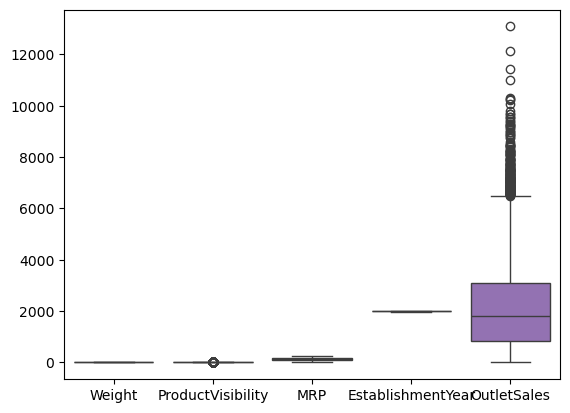

In [18]:
sns.boxplot(df)

In [27]:
# Calculate Q1 and Q3
q1 = df["OutletSales"].quantile(0.25)
q3 = df["OutletSales"].quantile(0.75)

# Calculate IQR
iqr = q3 - q1  # Corrected the subtraction

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out the outliers
df = df[(df["OutletSales"] > lower_bound) & (df["OutletSales"] < upper_bound)]


In [37]:
q1 = df["ProductVisibility"].quantile(0.25)
q3 = df["ProductVisibility"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["ProductVisibility"] > lower_bound) & (df["ProductVisibility"] < upper_bound)]

In [39]:
q1 = df["Weight"].quantile(0.25)
q3 = df["Weight"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["Weight"] > lower_bound) & (df["Weight"] < upper_bound)]

In [41]:
q1 = df["MRP"].quantile(0.25)
q3 = df["MRP"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["MRP"] > lower_bound) & (df["MRP"] < upper_bound)]

<Axes: >

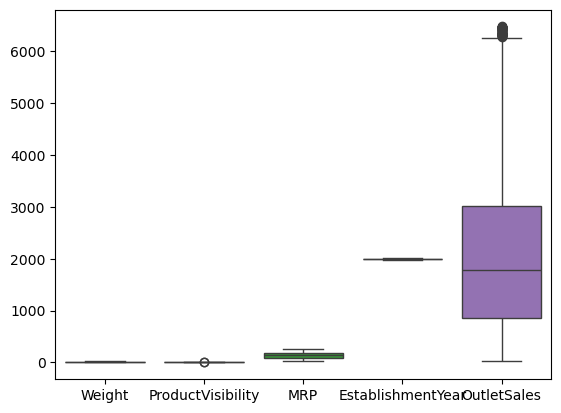

In [43]:
sns.boxplot(df)

In [47]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df['FatContent'].value_counts()

FatContent
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [23]:
df.replace({'FatContent': {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace = True )

In [25]:
df['FatContent'].value_counts()

FatContent
Low Fat    5517
Regular    3006
Name: count, dtype: int64

[Text(0.5, 1.0, 'FatContent by Item')]

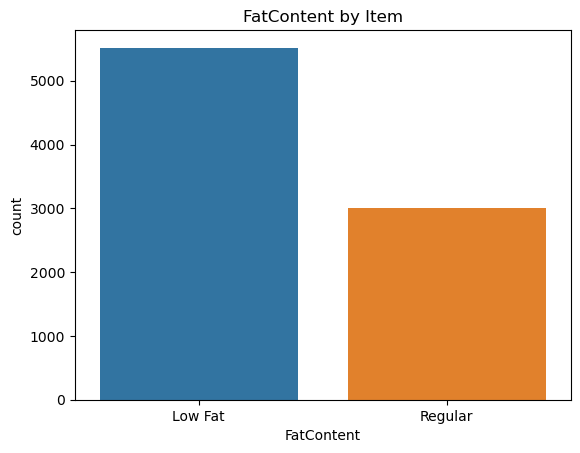

In [27]:
sns.countplot(data=df,x='FatContent',hue='FatContent').set(title="FatContent by Item")

In [29]:
df['ProductType'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

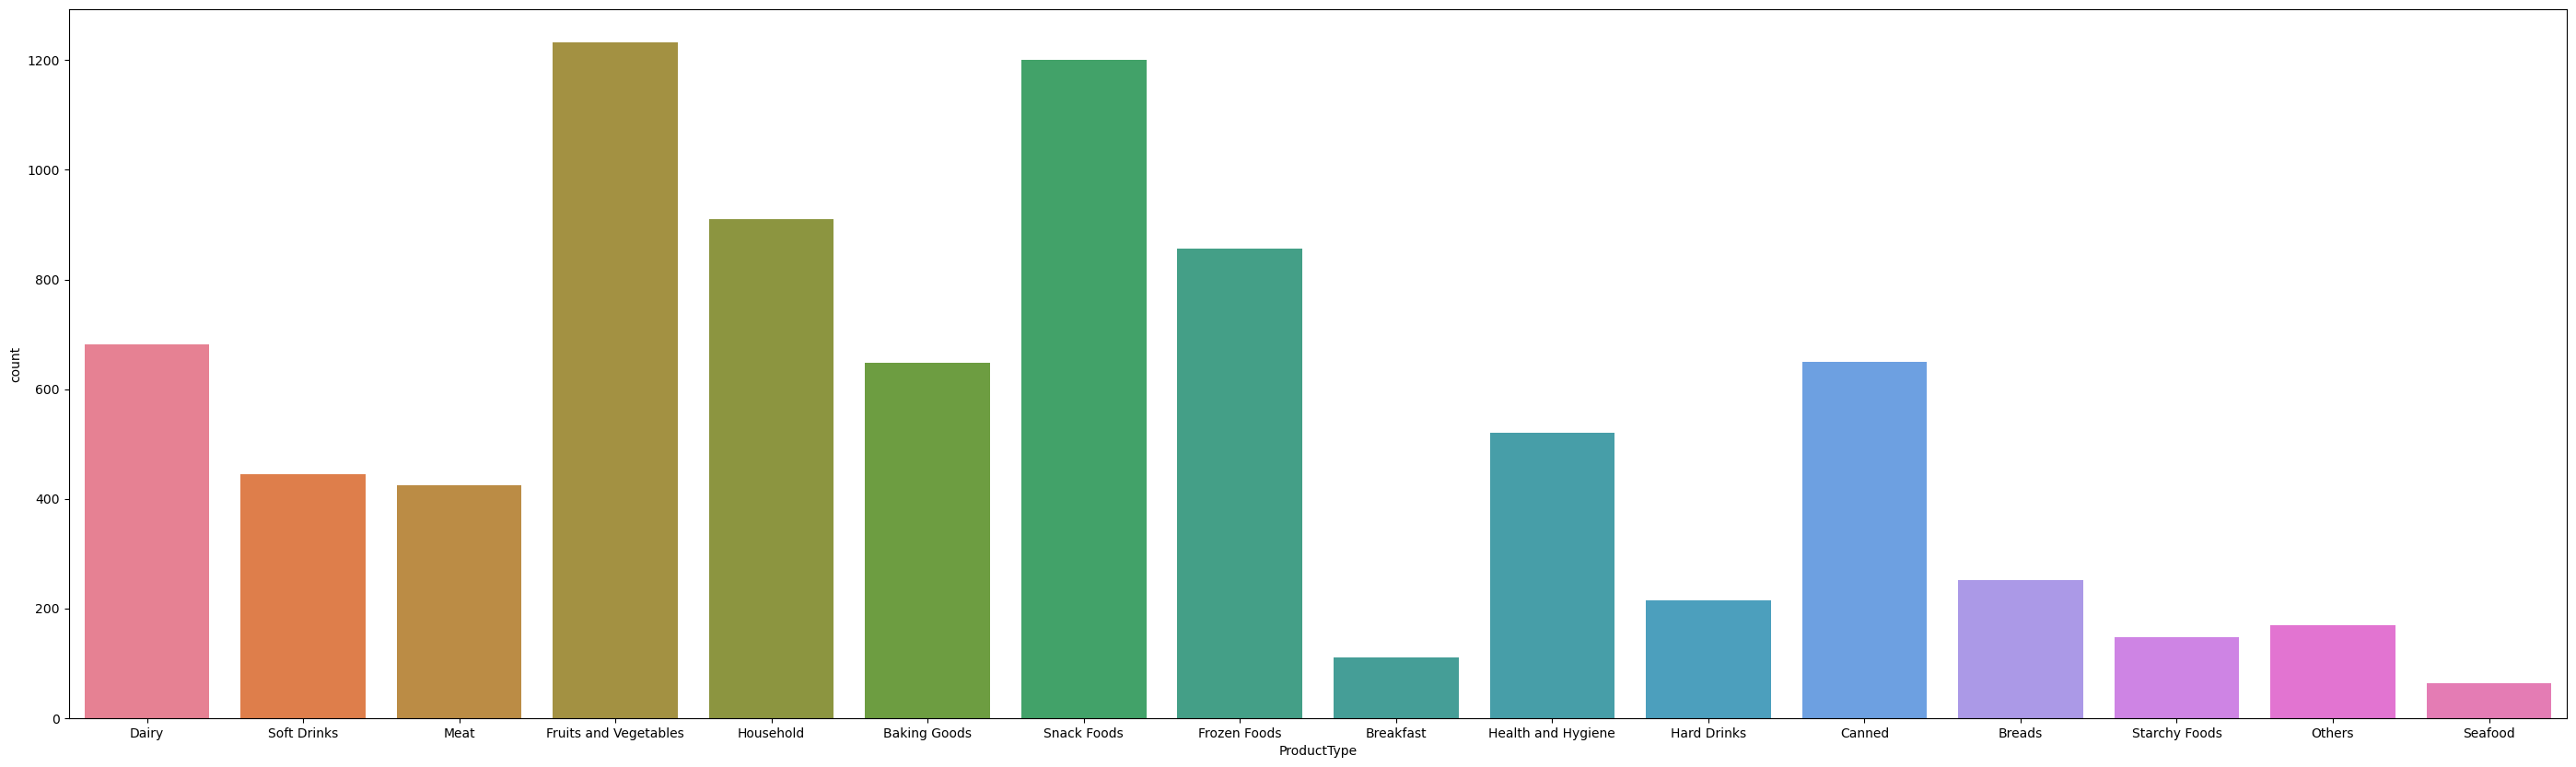

In [31]:
plt.figure(figsize = (35,10))
sns.countplot(x = 'ProductType',hue='ProductType', data = df)
plt.show()

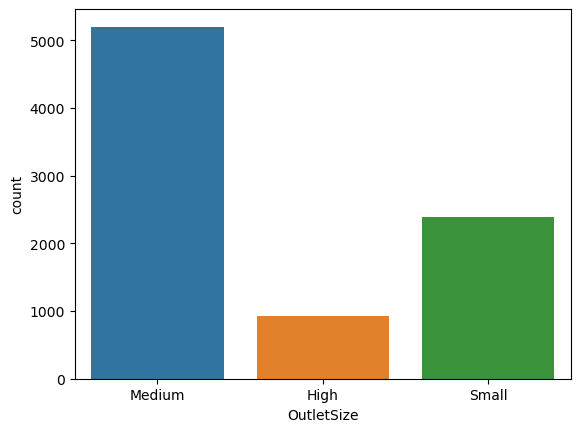

In [32]:
sns.countplot(data=df,x="OutletSize",hue="OutletSize")
plt.show()

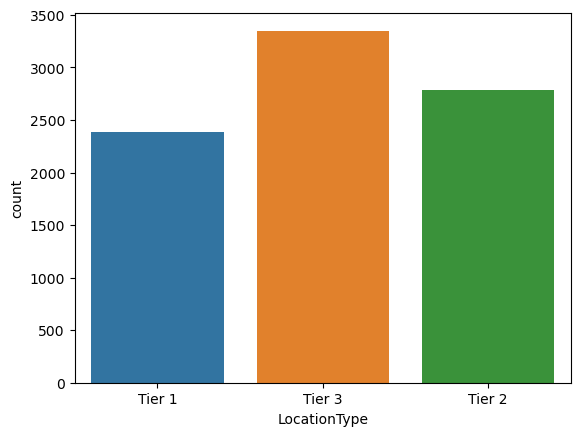

In [35]:
sns.countplot(data=df,x="LocationType",hue="LocationType")
plt.show()

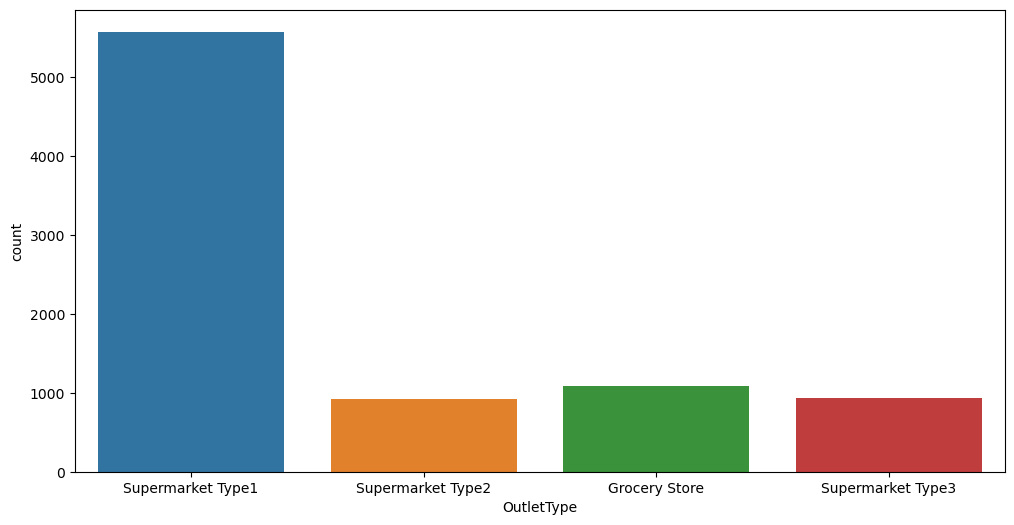

In [36]:
plt.figure(figsize = (12,6))
sns.countplot(data=df,x="OutletType",hue="OutletType")
plt.show()

<Figure size 1200x600 with 0 Axes>

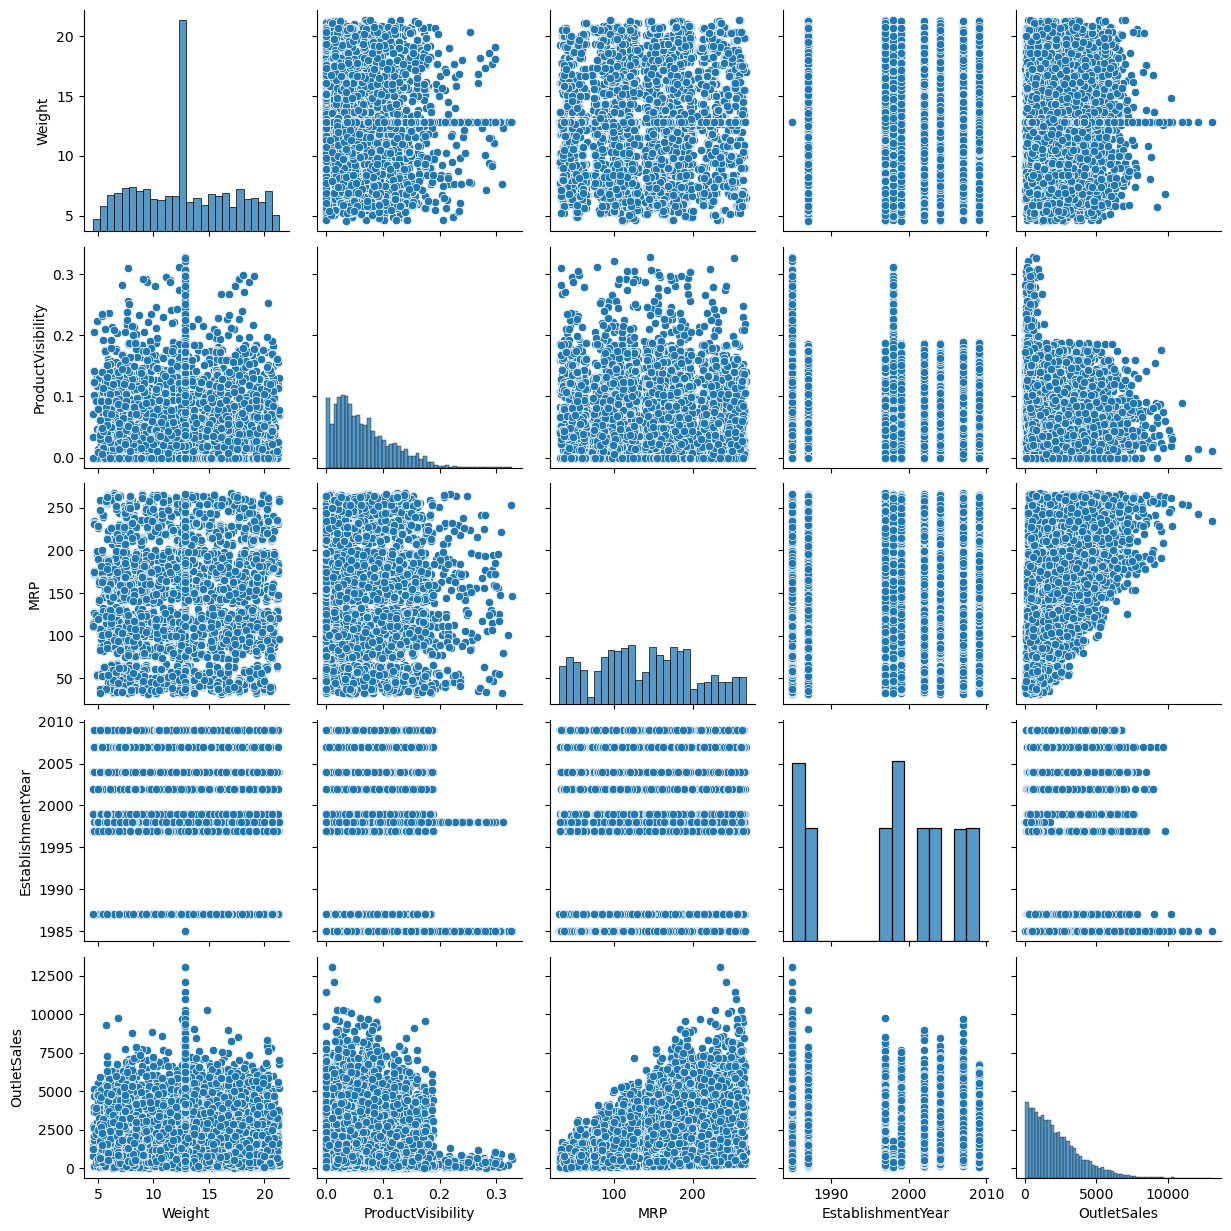

In [39]:
plt.figure(figsize = (12,6))
sns.pairplot(df)

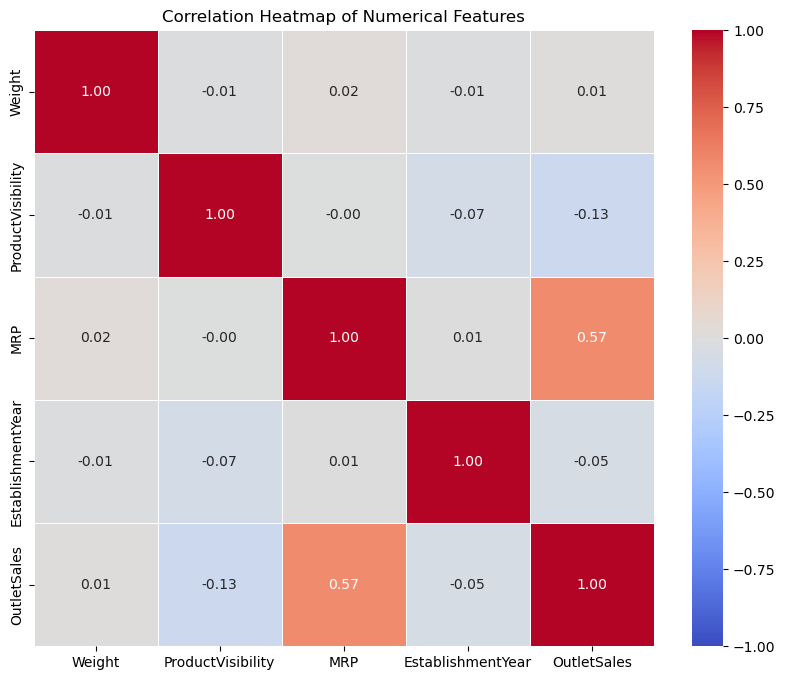

In [41]:
numerical_columns = df[['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSales']]
correlation_matrix = numerical_columns.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

#  Show the plot
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             8523 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         8523 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
df["ProductID"] = le . fit_transform(df['ProductID'])
df["FatContent"] = le . fit_transform(df['FatContent'])
df["ProductType"] = le . fit_transform(df['ProductType'])
df["OutletID"] = le . fit_transform(df['OutletID'])
df["OutletSize"] = le . fit_transform(df['OutletSize'])
df["LocationType"] = le . fit_transform(df['LocationType'])
df["OutletType"] = le . fit_transform(df['OutletType'])
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [49]:
df["OutletSales"].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [51]:
discrete_data_rounded = np.round(df["OutletSales"])

# Round to the nearest 100
discrete_data_rounded_100 = np.round(df["OutletSales"] / 100) * 100

print(discrete_data_rounded)
print(discrete_data_rounded_100)
print(df["OutletSales"])

0       3735.0
1        443.0
2       2097.0
3        732.0
4        995.0
         ...  
8518    2778.0
8519     549.0
8520    1193.0
8521    1846.0
8522     766.0
Name: OutletSales, Length: 8523, dtype: float64
0       3700.0
1        400.0
2       2100.0
3        700.0
4       1000.0
         ...  
8518    2800.0
8519     500.0
8520    1200.0
8521    1800.0
8522     800.0
Name: OutletSales, Length: 8523, dtype: float64
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: OutletSales, Length: 8523, dtype: float64


In [53]:
x=df.drop(["OutletSales"],axis=1)
y=df["OutletSales"]

In [55]:
x.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2, random_state = 42)

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score

# Define a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
}

# Store results for each model
results = []

# Loop through the models, train, predict and evaluate
for model_name, model in models.items():
    # Step 1: Train the model
    model.fit(x_train, y_train)
    
    # Step 2: Make predictions
    y_pred = model.predict(x_test)
    
    # Step 3: Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the results list
    results.append({
        "models": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE":rmse,
        "R2 Score": r2
    })

# Convert the results list to a DataFrame
metrics_score = pd.DataFrame(results)

# Round the values to 2 decimal places
metrics_score = metrics_score.round(2)

# Optionally, print the DataFrame
print(metrics_score)


                          models      MAE         MSE     RMSE  R2 Score
0              Linear Regression   854.96  1291997.45  1136.66      0.52
1        Random Forest Regressor   760.82  1191685.41  1091.64      0.56
2       Support Vector Regressor  1269.13  2791363.87  1670.74     -0.03
3  K-Nearest Neighbors Regressor  1094.56  2245059.67  1498.35      0.17
4        Decision Tree Regressor  1029.57  2222037.27  1490.65      0.18
